<a href="https://colab.research.google.com/github/NotYeshwanthReddy/flood_detection/blob/main/flood_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Projects/2020-Flood-Related-Multimedia-Task-master/dataset.zip" "./dataset.zip"

In [ ]:
!unzip "dataset.zip"

In [ ]:
import json

with open("/content/dataset/devset/devset_tweets_gt.json") as f:
  json_file = json.load(f)


In [ ]:
from tqdm import tqdm
import pandas as pd

labels = pd.DataFrame(columns=["tweet_id", "is_flood"])

for i,j in tqdm(enumerate(json_file)):
  labels.loc[i] = [list(j.keys())[0]+".png", int(list(j.values())[0])]

5419it [00:17, 303.98it/s]


In [ ]:
labels.to_csv("/content/dataset/devset/devset_tweets_gt.csv")

In [ ]:
!cp "/content/dataset/devset/devset_tweets_gt.csv" "/content/drive/MyDrive/Projects/2020-Flood-Related-Multimedia-Task-master/devset_tweets_gt.csv" 

In [ ]:
!cd dataset/images && ls

1000004673246556165.png  850999832223387648.png  912371458655031297.png
1000047593056063489.png  851012374836502530.png  912383314111139846.png
1000299045804494848.png  851063906533560320.png  912403616220303360.png
1000308800627228672.png  851126125870948352.png  912517148874035200.png
1000381546308751360.png  851332441025515520.png  912552536313401344.png
1000995585342693376.png  851389862687256577.png  912557351281991680.png
1001006355367583745.png  851466333556428801.png  912572622801481728.png
1001071398415163392.png  851511013694459905.png  912574393154498562.png
1001113093341097984.png  851737158285176833.png  912629686458568704.png
1001340924121755649.png  852072911007567872.png  912631824689586177.png
1001378729615134721.png  852073838363856896.png  912641861923344385.png
1001422288040980481.png  852099566845521920.png  912644975380385792.png
1001422597106667520.png  852231253378056192.png  912650713527996417.png
1001428660233166848.png  852239845942493184.png  912658902629670

# Model

## Data Process

In [ ]:
!cp "/content/dataset/images/866211297045643264.png" "/content/dataset/"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
img_size = 224

def get_data(labels, img_dir="/content/dataset/images/"):
  data = []
  for i in tqdm(labels.index):
    img_name, class_num = labels.loc[i].to_list()
    try:
      img_arr = cv2.imread(os.path.join(img_dir, img_name))[...,::-1] #convert BGR to RGB format
      resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
      data.append([resized_arr, class_num])
    except Exception as e:
      print(e)
  return np.array(data)

In [ ]:
data = get_data(labels)

  2%|▏         | 86/5419 [00:01<01:52, 47.55it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


  3%|▎         | 173/5419 [00:03<01:52, 46.64it/s]

'NoneType' object is not subscriptable


  5%|▌         | 278/5419 [00:05<01:38, 52.03it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


  7%|▋         | 377/5419 [00:07<01:37, 51.50it/s]

'NoneType' object is not subscriptable


  7%|▋         | 388/5419 [00:08<01:47, 46.94it/s]

'NoneType' object is not subscriptable


  8%|▊         | 415/5419 [00:08<01:41, 49.47it/s]

'NoneType' object is not subscriptable


 10%|▉         | 532/5419 [00:11<01:43, 47.18it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 12%|█▏        | 641/5419 [00:13<01:42, 46.57it/s]

'NoneType' object is not subscriptable


 14%|█▍        | 751/5419 [00:15<01:38, 47.40it/s]

'NoneType' object is not subscriptable


 14%|█▍        | 768/5419 [00:15<01:41, 45.99it/s]

'NoneType' object is not subscriptable


 15%|█▍        | 792/5419 [00:16<01:34, 49.00it/s]

'NoneType' object is not subscriptable


 16%|█▌        | 864/5419 [00:17<01:23, 54.41it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 17%|█▋        | 898/5419 [00:18<01:23, 53.89it/s]

'NoneType' object is not subscriptable


 18%|█▊        | 956/5419 [00:19<01:23, 53.15it/s]

'NoneType' object is not subscriptable


 18%|█▊        | 970/5419 [00:19<01:19, 56.30it/s]

'NoneType' object is not subscriptable


 20%|██        | 1093/5419 [00:22<01:24, 51.30it/s]

'NoneType' object is not subscriptable


 23%|██▎       | 1246/5419 [00:25<01:20, 51.78it/s]

'NoneType' object is not subscriptable


 24%|██▎       | 1279/5419 [00:26<01:18, 52.57it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 24%|██▍       | 1318/5419 [00:27<01:22, 49.71it/s]

'NoneType' object is not subscriptable


 27%|██▋       | 1445/5419 [00:29<01:21, 48.94it/s]

'NoneType' object is not subscriptable


 28%|██▊       | 1497/5419 [00:30<01:16, 51.05it/s]

'NoneType' object is not subscriptable


 29%|██▊       | 1548/5419 [00:31<01:07, 57.61it/s]

'NoneType' object is not subscriptable


 31%|███       | 1655/5419 [00:33<01:25, 44.12it/s]

'NoneType' object is not subscriptable


 34%|███▍      | 1830/5419 [00:37<01:16, 46.62it/s]

'NoneType' object is not subscriptable


 34%|███▍      | 1843/5419 [00:37<01:12, 49.41it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 35%|███▍      | 1880/5419 [00:38<01:12, 48.76it/s]

'NoneType' object is not subscriptable


 36%|███▌      | 1939/5419 [00:39<01:01, 56.31it/s]

'NoneType' object is not subscriptable


 37%|███▋      | 2018/5419 [00:41<01:13, 46.49it/s]

'NoneType' object is not subscriptable


 38%|███▊      | 2059/5419 [00:42<01:06, 50.65it/s]

'NoneType' object is not subscriptable


 40%|███▉      | 2143/5419 [00:43<01:05, 49.65it/s]

'NoneType' object is not subscriptable


 40%|████      | 2185/5419 [00:44<00:52, 61.38it/s]

'NoneType' object is not subscriptable


 41%|████      | 2223/5419 [00:45<00:55, 57.95it/s]

'NoneType' object is not subscriptable


 41%|████      | 2230/5419 [00:45<00:59, 53.49it/s]

'NoneType' object is not subscriptable


 42%|████▏     | 2249/5419 [00:45<01:03, 49.57it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 44%|████▍     | 2405/5419 [00:48<00:53, 56.17it/s]

'NoneType' object is not subscriptable


 46%|████▌     | 2475/5419 [00:49<00:50, 58.04it/s]

'NoneType' object is not subscriptable


 46%|████▋     | 2518/5419 [00:50<01:06, 43.78it/s]

'NoneType' object is not subscriptable


 48%|████▊     | 2620/5419 [00:52<00:56, 49.63it/s]

'NoneType' object is not subscriptable


 49%|████▊     | 2641/5419 [00:53<00:51, 53.85it/s]

'NoneType' object is not subscriptable


 51%|█████     | 2754/5419 [00:55<00:53, 49.73it/s]

'NoneType' object is not subscriptable


 54%|█████▎    | 2906/5419 [00:58<00:52, 48.14it/s]

'NoneType' object is not subscriptable


 55%|█████▍    | 2971/5419 [00:59<00:49, 49.81it/s]

'NoneType' object is not subscriptable


 57%|█████▋    | 3096/5419 [01:02<00:49, 47.28it/s]

'NoneType' object is not subscriptable


 63%|██████▎   | 3440/5419 [01:09<00:36, 53.82it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 66%|██████▋   | 3600/5419 [01:12<00:33, 54.92it/s]

'NoneType' object is not subscriptable


 72%|███████▏  | 3909/5419 [01:18<00:27, 55.40it/s]

'NoneType' object is not subscriptable


 72%|███████▏  | 3921/5419 [01:18<00:29, 50.53it/s]

'NoneType' object is not subscriptable


 75%|███████▌  | 4086/5419 [01:22<00:23, 55.73it/s]

'NoneType' object is not subscriptable


 78%|███████▊  | 4240/5419 [01:25<00:22, 52.06it/s]

'NoneType' object is not subscriptable


 79%|███████▉  | 4280/5419 [01:26<00:19, 59.64it/s]

'NoneType' object is not subscriptable


 80%|███████▉  | 4319/5419 [01:26<00:22, 49.12it/s]

'NoneType' object is not subscriptable


 82%|████████▏ | 4431/5419 [01:29<00:17, 55.28it/s]

'NoneType' object is not subscriptable


 83%|████████▎ | 4491/5419 [01:30<00:17, 51.86it/s]

'NoneType' object is not subscriptable


 84%|████████▍ | 4555/5419 [01:31<00:17, 50.79it/s]

'NoneType' object is not subscriptable


 85%|████████▍ | 4593/5419 [01:32<00:15, 52.99it/s]

'NoneType' object is not subscriptable


 85%|████████▌ | 4613/5419 [01:32<00:15, 51.97it/s]

'NoneType' object is not subscriptable


 85%|████████▌ | 4625/5419 [01:32<00:15, 52.64it/s]

'NoneType' object is not subscriptable


 86%|████████▋ | 4681/5419 [01:33<00:13, 55.13it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable

 87%|████████▋ | 4688/5419 [01:34<00:13, 56.11it/s]

 92%|█████████▏| 4992/5419 [01:40<00:08, 51.11it/s]

'NoneType' object is not subscriptable


 95%|█████████▍| 5126/5419 [01:42<00:05, 52.56it/s]

'NoneType' object is not subscriptable


 95%|█████████▌| 5153/5419 [01:43<00:04, 55.84it/s]

'NoneType' object is not subscriptable


 95%|█████████▌| 5171/5419 [01:43<00:05, 45.22it/s]

'NoneType' object is not subscriptable


 96%|█████████▌| 5189/5419 [01:43<00:04, 47.30it/s]

'NoneType' object is not subscriptable


 98%|█████████▊| 5291/5419 [01:45<00:02, 51.53it/s]

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


 98%|█████████▊| 5329/5419 [01:46<00:01, 50.87it/s]

'NoneType' object is not subscriptable


100%|██████████| 5419/5419 [01:48<00:00, 49.84it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


## Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


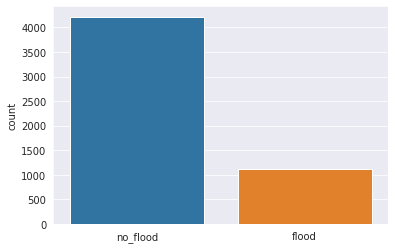

In [ ]:
l = []
for i in data:
    if(i[1] == 0):
        l.append("no_flood")
    else:
        l.append("flood")
sns.set_style('darkgrid')
sns.countplot(l)

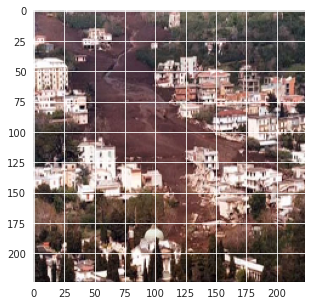

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(data[1][0])

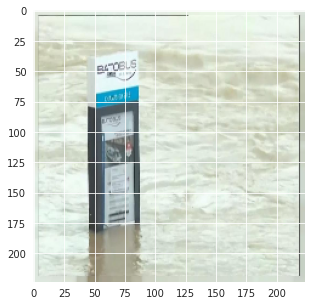

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(data[-1][0])

## Train Test Split

In [ ]:
train,val = data[:5000], data[5000:]

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

## Training

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# VGG16

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2021-04-20 16:04:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   144MB/s    in 0.5s    

2021-04-20 16:04:26 (144 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

